In [2]:
import numpy as np

def euclidean_distance(c1, c2):
    return np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)

class AntColony:
    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distances  = np.where(distances == 0, np.inf, distances)
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("route", float('inf'))
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheromone(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path
            self.pheromone *= self.decay
        return all_time_shortest_path

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in range(len(path) - 1):
            total_dist += self.distances[path[ele]][path[ele+1]]
        total_dist += self.distances[path[-1]][path[0]]  # Return to start
        return total_dist

    def spread_pheromone(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in range(len(path) - 1):
                self.pheromone[path[move]][path[move+1]] += 1.0 / self.distances[path[move]][path[move+1]]
            self.pheromone[path[-1]][path[0]] += 1.0 / self.distances[path[-1]][path[0]]

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append(move)
            prev = move
            visited.add(move)
        path.append(start)
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0
        row = pheromone ** self.alpha * ((1.0 / dist) ** self.beta)
        norm_row = row / row.sum()
        move = np.random.choice(self.all_inds, 1, p=norm_row)[0]
        return move

# Defined coordinates for 6 cities
coordinates = np.array([
    [30, 40],  # City 1
    [40, 70],  # City 2
    [70, 40],  # City 3
    [50, 30],  # City 4
    [60, 70],  # City 5
    [80, 50]   # City 6
])

# Calculate distance matrix
distances = np.zeros((6, 6))
for i in range(6):
    for j in range(6):
        if i != j:
            distances[i][j] = euclidean_distance(coordinates[i], coordinates[j])
        else:
            distances[i][j] = np.inf

# Create and run the Ant Colony Optimization
aco = AntColony(distances, n_ants=10, n_best=3, n_iterations=100, decay=0.95, alpha=1, beta=2)
shortest_path = aco.run()
print(f"Shortest path: {shortest_path}")


Shortest path: ([3, 2, 5, 4, 1, 0], 138.77054302287243)


Shortest path: ([1, 4, 5, 2, 3, 0], 138.77054302287243)


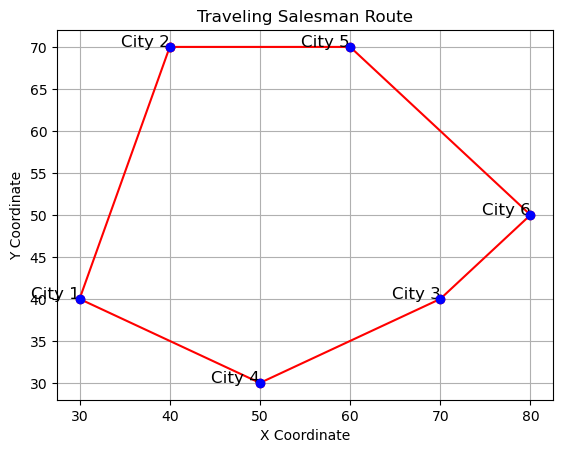

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(c1, c2):
    return np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)

class AntColony:
    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distances = np.where(distances == 0, np.inf, distances)
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("route", float('inf'))
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheromone(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path
            self.pheromone *= self.decay
        return all_time_shortest_path

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in range(len(path) - 1):
            total_dist += self.distances[path[ele]][path[ele+1]]
        total_dist += self.distances[path[-1]][path[0]]  # Return to start
        return total_dist

    def spread_pheromone(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in range(len(path) - 1):
                self.pheromone[path[move]][path[move+1]] += 1.0 / self.distances[path[move]][path[move+1]]
            self.pheromone[path[-1]][path[0]] += 1.0 / self.distances[path[-1]][path[0]]

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append(move)
            prev = move
            visited.add(move)
        path.append(start)
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0
        row = pheromone ** self.alpha * ((1.0 / dist) ** self.beta)
        norm_row = row / row.sum()
        move = np.random.choice(self.all_inds, 1, p=norm_row)[0]
        return move

def plot_route(coordinates, route):
    route_coordinates = coordinates[route]
    route_coordinates = np.vstack([route_coordinates, route_coordinates[0]])
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue', zorder=5)
    plt.plot(route_coordinates[:, 0], route_coordinates[:, 1], color='red', linestyle='-', marker='o')
    for i, coord in enumerate(coordinates):
        plt.text(coord[0], coord[1], f'City {i+1}', fontsize=12, ha='right')
    plt.title('Traveling Salesman Route')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

# Example coordinates and usage
coordinates = np.array([
    [30, 40],  # City 1
    [40, 70],  # City 2
    [70, 40],  # City 3
    [50, 30],  # City 4
    [60, 70],  # City 5
    [80, 50]   # City 6
])
distances = np.array([[euclidean_distance(coordinates[i], coordinates[j]) for j in range(len(coordinates))] for i in range(len(coordinates))])
np.fill_diagonal(distances, np.inf)

aco = AntColony(distances, n_ants=10, n_best=3, n_iterations=100, decay=0.95, alpha=1, beta=2)
result = aco.run()
print(f"Shortest path: {result}")

# Plot the route
plot_route(coordinates, result[0])


Shortest path: ([1, 4, 5, 2, 3, 0], 138.77054302287243)
All generated routes:
([5, 1, 4, 2, 3, 0], 192.05569083760324)
([3, 1, 5, 2, 4, 0], 196.5044146777779)
([3, 2, 5, 1, 4, 0], 166.0112615949154)
([1, 4, 2, 5, 3, 0], 155.80388135673633)
([3, 4, 2, 5, 1, 0], 185.70078440826885)
([4, 1, 5, 2, 3, 0], 166.0112615949154)
([3, 2, 5, 1, 4, 0], 166.0112615949154)
([1, 4, 5, 2, 3, 0], 138.77054302287243)
([1, 4, 3, 2, 5, 0], 180.34684339251712)


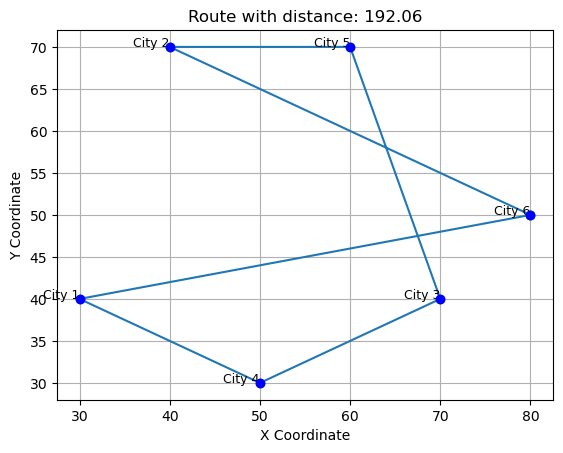

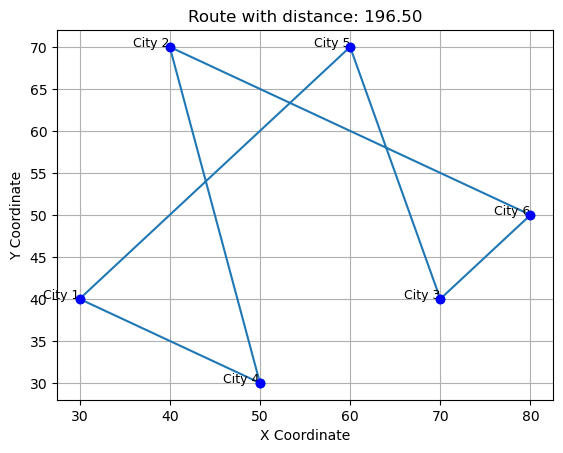

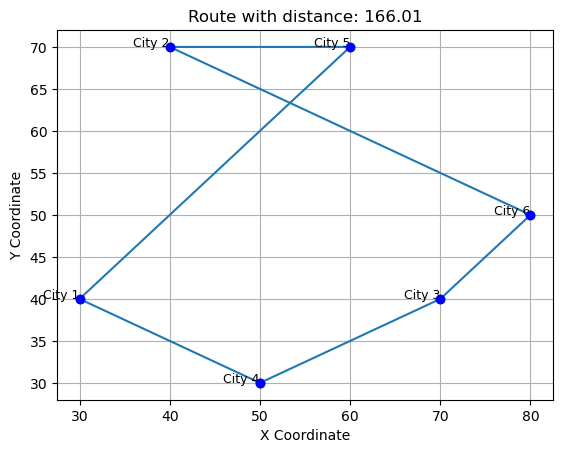

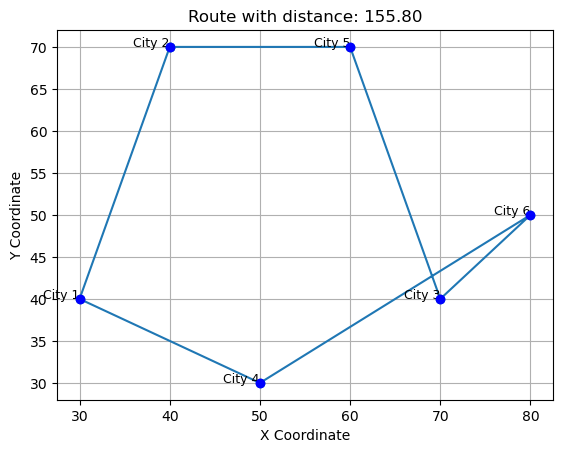

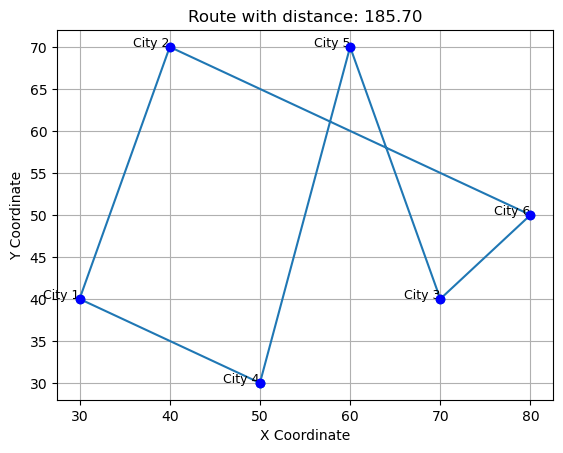

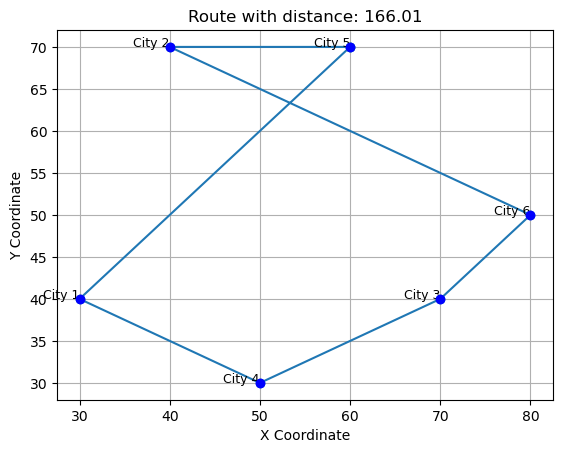

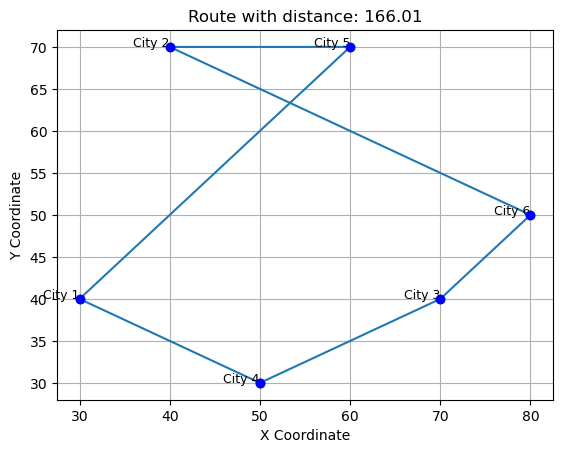

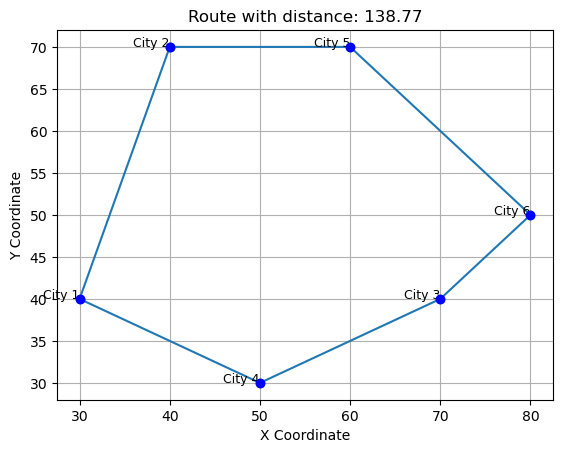

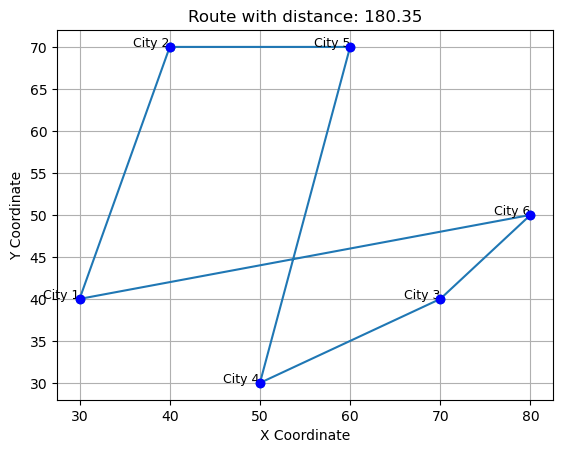

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(c1, c2):
    return np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)

class AntColony:
    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distances = np.where(distances == 0, np.inf, distances)
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.all_routes = []  # Store all routes generated

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("route", float('inf'))
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.all_routes.extend(all_paths)  # Capture all routes
            self.spread_pheromone(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path
            self.pheromone *= self.decay
        return all_time_shortest_path

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        while len(visited) < len(self.distances):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append(move)
            prev = move
            visited.add(move)
        path.append(start)  # Return to the start to close the loop
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0
        row = pheromone ** self.alpha * ((1.0 / dist) ** self.beta)
        norm_row = row / row.sum()
        move = np.random.choice(self.all_inds, 1, p=norm_row)[0]
        return move

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in range(len(path) - 1):
            total_dist += self.distances[path[ele]][path[ele+1]]
        total_dist += self.distances[path[0]][path[-1]]  # Return to start
        return total_dist

    def spread_pheromone(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in range(len(path) - 1):
                self.pheromone[path[move]][path[move+1]] += 1.0 / self.distances[path[move]][path[move+1]]
            self.pheromone[path[-1]][path[0]] += 1.0 / self.distances[path[-1]][path[0]]

def plot_routes(coordinates, routes):
    for route, dist in routes:
        route_coords = coordinates[np.array(route)]
        route_coords = np.vstack([route_coords, route_coords[0]])  # Close the loop
        plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue', zorder=5)
        plt.plot(route_coords[:, 0], route_coords[:, 1], linestyle='-', marker='o')
        for i, coord in enumerate(coordinates):
            plt.text(coord[0], coord[1], f'City {i+1}', fontsize=9, ha='right')
        plt.title(f'Route with distance: {dist:.2f}')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(True)
        plt.show()

# Example coordinates and usage
coordinates = np.array([
    [30, 40],  # City 1
    [40, 70],  # City 2
    [70, 40],  # City 3
    [50, 30],  # City 4
    [60, 70],  # City 5
    [80, 50]   # City 6
])
distances = np.array([[euclidean_distance(coordinates[i], coordinates[j]) for j in range(len(coordinates))] for i in range(len(coordinates))])
np.fill_diagonal(distances, np.inf)

aco = AntColony(distances, n_ants=3, n_best=1, n_iterations=3, decay=0.95, alpha=1, beta=2)
result = aco.run()
print(f"Shortest path: {result}")

# Print and plot all generated routes
print("All generated routes:")
for path in aco.all_routes:
    print(path)
plot_routes(coordinates, aco.all_routes)
